In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt

In [2]:
url = r'https://finance.naver.com/item/sise_day.nhn?code=005930'
source = urlopen(url)
soup = BeautifulSoup(source, 'lxml')

In [3]:
dates = soup.find_all('span', class_ = 'tah p10 gray03')
dates

[<span class="tah p10 gray03">2020.06.05</span>,
 <span class="tah p10 gray03">2020.06.04</span>,
 <span class="tah p10 gray03">2020.06.03</span>,
 <span class="tah p10 gray03">2020.06.02</span>,
 <span class="tah p10 gray03">2020.06.01</span>,
 <span class="tah p10 gray03">2020.05.29</span>,
 <span class="tah p10 gray03">2020.05.28</span>,
 <span class="tah p10 gray03">2020.05.27</span>,
 <span class="tah p10 gray03">2020.05.26</span>,
 <span class="tah p10 gray03">2020.05.25</span>]

In [4]:
prices = soup.find_all('td', class_ = 'num')
prices

[<td class="num"><span class="tah p11">55,500</span></td>, <td class="num">
 <img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
 				900
 				</span>
 </td>, <td class="num"><span class="tah p11">54,400</span></td>, <td class="num"><span class="tah p11">55,900</span></td>, <td class="num"><span class="tah p11">54,000</span></td>, <td class="num"><span class="tah p11">22,399,065</span></td>, <td class="num"><span class="tah p11">54,600</span></td>, <td class="num">
 <img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
 				100
 				</span>
 </td>, <td class="num"><span class="tah p11">55,800</span></td>, <td class="num"><span class="tah p11">57,000</span></td>, <td class="num"><span class="tah p11">54,600</span></td>, <td class="num"><span class="tah p11">40,220,334</span></td>, <td

In [5]:
last_page = soup.find_all('a')[11]['href']
last_page = last_page.split('=')
last_page[2]

'602'

In [6]:
def date_format(d):
    d = str(d).replace('-', '.')
    yyyy = int(d.split('.')[0])
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])
    
    this_date = dt.date(yyyy, mm, dd)
    return this_date



In [7]:
a = str(2017-1-1)
a

'2015'

In [8]:
def historical_stock_naver(stock_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    # 파라미터로는 
    # index_cd (코드명. ex, 코스피, 코스피200 ..의 코드번호들) 
    # start_date(원하는 기간의 시작일), end_date(종료일) 날짜를 문자열로 넣는다
    # page_n =1   항상 1페이지 부터 시작한다
    # last_page = 0  마지막페이지는 아직 몇인지 모르니 우선 0으로 놓는다
    
    if start_date:                                   # 만약 start_date를 정의해줬으면
        start_date = date_format(start_date)        # start_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        start_date = dt.date.today()                # 만약 start_date를 정의해주지 않았다면 오늘 날짜로 정의
    
    if end_date:                                    # 만약 end_date를 정의해줬으면
        end_date = date_format(end_date)            # end_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        end_date = dt.date.today()                  # 만약 end_date를 정의해주지 않았다면 오늘 날짜로 정의
        
        
    # 코스피200 일별시세 url 소스코드를 가져오기
        
    naver_stock = r'https://finance.naver.com/item/sise_day.nhn?code='+ stock_cd + '&page=' + str(page_n)
    source = urlopen(naver_stock).read()
    source = BeautifulSoup(source, 'lxml')
    
    dates = source.find_all('span', class_ = 'tah p10 gray03')
    prices = source.find_all('td', class_ = 'num')
    
    
    
    for n in range(len(dates)): # 특정페이지에서 6개의 날짜가 출력됨. 6개의 날짜데이터 모두 코르블록 실행
            
            this_date = dates[n].text              # n번째 태그에서 날짜인 text만 가져오기
            this_date = date_format(this_date)     # 위에서 정의해준 date_format함수로 원하는 형태로 날짜 만들어주기
            
            # 만약 this_date가 정의해줄 end_date보다 작거나 같고 start_date보다 크거나 같으면 코드블록 실행
            # 즉 end_date와 start_date 사이의 날짜들에 대해서만 코드 실행
            
            if this_date <= end_date and this_date >= start_date:  
                
            # 종가 처리
                this_close = prices[n*6].text            #종가는 ('td', class_='number_1')을 가진 소스들의 5번째에 옴
                                                         # 그러므르 인덱스는 4의 배수(4*n)이 필요

                this_close = this_close.replace(',', '')  # 숫자의 천 단위마다 있는 ,를 빼준다.
                this_close = float(this_close)            # 그후 실수타입으로 바꿔줌

            # 딕셔너리에 저장
                historical_prices[this_date] = this_close # 날짜:종가 형태가 나올 수 있도록 dict에 저장
            
            elif this_date < start_date:                  
                return historical_prices
            
    # 페이지 내비게이션 / 일별시세의 마지막 페이지가 몇인지 알기위함
    if last_page == 0:                          
        last_page = source.find_all('a')[11]['href']
        last_page = last_page.split('=')
        last_page = int(last_page[2])
    
    # 다음페이지 호출
    if page_n <= last_page: #페이지가 마지막 페이지까지 돌 수 있도록 하기
        page_n += 1        #페이지는 하나씩 올라가야함
        historical_stock_naver(stock_cd, start_date, end_date, page_n, last_page)
        
        # 만약 마지막 페이지가 5라고 하면
        # 우리가 정의해준 함수 historical_index_naver는
        # historical_index_naver(index_cd, start_date, end_date, 1, 5)
        # historical_index_naver(index_cd, start_date, end_date, 2, 5) ... 이런식으로 page_n가 5가 될때까지 실행
    
    return historical_prices # 반환은 dict 타입인 historical_prices로 한다

In [9]:
stock_cd = '005930'
historical_prices = {}
start_date = '2017-1-1'
end_date = '2017-1-31'
historical_stock_naver(stock_cd, start_date, end_date)


{datetime.date(2017, 1, 31): 1973000.0,
 datetime.date(2017, 1, 26): 1995000.0,
 datetime.date(2017, 1, 25): 1970000.0,
 datetime.date(2017, 1, 24): 1908000.0,
 datetime.date(2017, 1, 23): 1903000.0,
 datetime.date(2017, 1, 20): 1860000.0,
 datetime.date(2017, 1, 19): 1874000.0,
 datetime.date(2017, 1, 18): 1847000.0,
 datetime.date(2017, 1, 17): 1848000.0,
 datetime.date(2017, 1, 16): 1833000.0,
 datetime.date(2017, 1, 13): 1873000.0,
 datetime.date(2017, 1, 12): 1940000.0,
 datetime.date(2017, 1, 11): 1914000.0,
 datetime.date(2017, 1, 10): 1862000.0,
 datetime.date(2017, 1, 9): 1861000.0,
 datetime.date(2017, 1, 6): 1810000.0,
 datetime.date(2017, 1, 5): 1778000.0,
 datetime.date(2017, 1, 4): 1808000.0,
 datetime.date(2017, 1, 3): 1824000.0,
 datetime.date(2017, 1, 2): 1805000.0}

In [27]:
k10_component = ['005930', '000660', '207940', '035420', '068270', '051910', '006400', '035720', '051900', '005380']

k10_historical_prices = dict()

for i in k10_component:
    stock_cd = i
    historical_prices = dict()
    start_date = '2017-1-1'
    end_date = '2017-12-31'
    historical_stock_naver(stock_cd, start_date, end_date)
    
    k10_historical_prices[stock_cd] = historical_prices

In [28]:
k10_historical_prices

{'005930': {datetime.date(2017, 12, 28): 2548000.0,
  datetime.date(2017, 12, 27): 2468000.0,
  datetime.date(2017, 12, 26): 2410000.0,
  datetime.date(2017, 12, 22): 2485000.0,
  datetime.date(2017, 12, 21): 2457000.0,
  datetime.date(2017, 12, 20): 2544000.0,
  datetime.date(2017, 12, 19): 2578000.0,
  datetime.date(2017, 12, 18): 2560000.0,
  datetime.date(2017, 12, 15): 2531000.0,
  datetime.date(2017, 12, 14): 2553000.0,
  datetime.date(2017, 12, 13): 2566000.0,
  datetime.date(2017, 12, 12): 2605000.0,
  datetime.date(2017, 12, 11): 2589000.0,
  datetime.date(2017, 12, 8): 2600000.0,
  datetime.date(2017, 12, 7): 2537000.0,
  datetime.date(2017, 12, 6): 2501000.0,
  datetime.date(2017, 12, 5): 2563000.0,
  datetime.date(2017, 12, 4): 2567000.0,
  datetime.date(2017, 12, 1): 2542000.0,
  datetime.date(2017, 11, 30): 2540000.0,
  datetime.date(2017, 11, 29): 2630000.0,
  datetime.date(2017, 11, 28): 2664000.0,
  datetime.date(2017, 11, 27): 2632000.0,
  datetime.date(2017, 11, 24):

In [29]:
k10_historical_prices = pd.DataFrame(k10_historical_prices)
k10_historical_prices

,005930,000660,207940,035420,068270,051910,006400,035720,051900,005380
2017-12-28,2548000.0,76500.0,371000.0,870000.0,221100.0,405000.0,204500.0,137000.0,1189000.0,156000.0
2017-12-27,2468000.0,75100.0,366000.0,877000.0,220000.0,394500.0,197500.0,139500.0,1174000.0,156500.0
2017-12-26,2410000.0,74000.0,344500.0,874000.0,195000.0,392000.0,195000.0,126000.0,1182000.0,154000.0
2017-12-22,2485000.0,76700.0,347000.0,862000.0,201900.0,393500.0,202500.0,129500.0,1178000.0,153000.0
2017-12-21,2457000.0,77000.0,349000.0,842000.0,197300.0,391000.0,202000.0,129000.0,1187000.0,150000.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-06,1810000.0,48000.0,157500.0,799000.0,105300.0,266000.0,113000.0,83700.0,850000.0,151000.0
2017-01-05,1778000.0,46950.0,157500.0,791000.0,106400.0,267500.0,112000.0,84000.0,838000.0,153500.0
2017-01-04,1808000.0,46500.0,154500.0,810000.0,106100.0,268500.0,108500.0,84300.0,851000.0,154000.0
2017-01-03,1824000.0,47250.0,158000.0,767000.0,106600.0,262000.0,110000.0,80000.0,836000.0,153000.0


In [30]:
k10_historical_prices.sort_index(axis=1, inplace=True)
k10_historical_prices.sort_index(axis=0, inplace=True)
k10_historical_prices

,000660,005380,005930,006400,035420,035720,051900,051910,068270,207940
2017-01-02,45800.0,150000.0,1805000.0,106000.0,777000.0,76700.0,817000.0,253000.0,108200.0,156500.0
2017-01-03,47250.0,153000.0,1824000.0,110000.0,767000.0,80000.0,836000.0,262000.0,106600.0,158000.0
2017-01-04,46500.0,154000.0,1808000.0,108500.0,810000.0,84300.0,851000.0,268500.0,106100.0,154500.0
2017-01-05,46950.0,153500.0,1778000.0,112000.0,791000.0,84000.0,838000.0,267500.0,106400.0,157500.0
2017-01-06,48000.0,151000.0,1810000.0,113000.0,799000.0,83700.0,850000.0,266000.0,105300.0,157500.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-21,77000.0,150000.0,2457000.0,202000.0,842000.0,129000.0,1187000.0,391000.0,197300.0,349000.0
2017-12-22,76700.0,153000.0,2485000.0,202500.0,862000.0,129500.0,1178000.0,393500.0,201900.0,347000.0
2017-12-26,74000.0,154000.0,2410000.0,195000.0,874000.0,126000.0,1182000.0,392000.0,195000.0,344500.0
2017-12-27,75100.0,156500.0,2468000.0,197500.0,877000.0,139500.0,1174000.0,394500.0,220000.0,366000.0


In [31]:
# 보간작업
k10_historical_prices = k10_historical_prices.fillna(method = 'ffill')
if k10_historical_prices.isnull().values.any(): # 만약 none데이터가 하나라도 있다면
    k10_historical_prices = k10_historical_prices.fillna(method = 'bfill')
k10_historical_prices

,000660,005380,005930,006400,035420,035720,051900,051910,068270,207940
2017-01-02,45800.0,150000.0,1805000.0,106000.0,777000.0,76700.0,817000.0,253000.0,108200.0,156500.0
2017-01-03,47250.0,153000.0,1824000.0,110000.0,767000.0,80000.0,836000.0,262000.0,106600.0,158000.0
2017-01-04,46500.0,154000.0,1808000.0,108500.0,810000.0,84300.0,851000.0,268500.0,106100.0,154500.0
2017-01-05,46950.0,153500.0,1778000.0,112000.0,791000.0,84000.0,838000.0,267500.0,106400.0,157500.0
2017-01-06,48000.0,151000.0,1810000.0,113000.0,799000.0,83700.0,850000.0,266000.0,105300.0,157500.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-21,77000.0,150000.0,2457000.0,202000.0,842000.0,129000.0,1187000.0,391000.0,197300.0,349000.0
2017-12-22,76700.0,153000.0,2485000.0,202500.0,862000.0,129500.0,1178000.0,393500.0,201900.0,347000.0
2017-12-26,74000.0,154000.0,2410000.0,195000.0,874000.0,126000.0,1182000.0,392000.0,195000.0,344500.0
2017-12-27,75100.0,156500.0,2468000.0,197500.0,877000.0,139500.0,1174000.0,394500.0,220000.0,366000.0


In [34]:
k10_historical_prices['005930'] = k10_historical_prices['005930'] * 50 
#한번더 나눠버려서 다시 곱함..
k10_historical_prices

,000660,005380,005930,006400,035420,035720,051900,051910,068270,207940
2017-01-02,45800.0,150000.0,36100.0,106000.0,777000.0,76700.0,817000.0,253000.0,108200.0,156500.0
2017-01-03,47250.0,153000.0,36480.0,110000.0,767000.0,80000.0,836000.0,262000.0,106600.0,158000.0
2017-01-04,46500.0,154000.0,36160.0,108500.0,810000.0,84300.0,851000.0,268500.0,106100.0,154500.0
2017-01-05,46950.0,153500.0,35560.0,112000.0,791000.0,84000.0,838000.0,267500.0,106400.0,157500.0
2017-01-06,48000.0,151000.0,36200.0,113000.0,799000.0,83700.0,850000.0,266000.0,105300.0,157500.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-21,77000.0,150000.0,49140.0,202000.0,842000.0,129000.0,1187000.0,391000.0,197300.0,349000.0
2017-12-22,76700.0,153000.0,49700.0,202500.0,862000.0,129500.0,1178000.0,393500.0,201900.0,347000.0
2017-12-26,74000.0,154000.0,48200.0,195000.0,874000.0,126000.0,1182000.0,392000.0,195000.0,344500.0
2017-12-27,75100.0,156500.0,49360.0,197500.0,877000.0,139500.0,1174000.0,394500.0,220000.0,366000.0


In [50]:
def stock_info(stock_cd):
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=' + stock_cd

    source = urlopen(url)
    soup = BeautifulSoup(source, 'lxml')
    
    soup.find('tbody').find_all('td', class_ = 'num')[6].text
    
    tmp = soup.find('tbody').find_all('td', class_ = 'num')[6].text
    
    tmp = tmp.replace('\r', '')
    tmp = tmp.replace('\n', '')
    tmp = tmp.replace('\t', '')
    
    tmp = tmp.split('/')
    
    outstanding = tmp[0].replace(',', '')
    outstanding = outstanding.replace('주', '')
    outstanding = int(outstanding)
    
    floating = tmp[1].replace('%', '')
    floating = float(floating)
    
    name = soup.find('span', class_ = 'name').text  
    
    K10_outstanding[stock_cd] = outstanding
    K10_floating[stock_cd] = floating
    K10_name[stock_cd] = name

In [51]:
K10_component = ['005930', '000660', '207940', '035420', '068270', '051910', '006400', '035720', '051900', '005380']

In [52]:
K10_outstanding = {}
K10_floating = {}
K10_name = {}
for stock_cd in K10_component:
    stock_info(stock_cd)

In [53]:
K10_outstanding

{'005930': 5969782550,
 '000660': 728002365,
 '207940': 66165000,
 '035420': 164263395,
 '068270': 134939385,
 '051910': 70592343,
 '006400': 68764530,
 '035720': 87158877,
 '051900': 15618197,
 '005380': 213668187}

In [58]:
tmp = {'Outstanding' : K10_outstanding,
       'Floating' : K10_floating,
       'Price' : k10_historical_prices.iloc[0],
       'name' : K10_name
      }

tmp

{'Outstanding': {'005930': 5969782550,
  '000660': 728002365,
  '207940': 66165000,
  '035420': 164263395,
  '068270': 134939385,
  '051910': 70592343,
  '006400': 68764530,
  '035720': 87158877,
  '051900': 15618197,
  '005380': 213668187},
 'Floating': {'005930': 78.79,
  '000660': 73.89,
  '207940': 24.75,
  '035420': 75.93,
  '068270': 75.66,
  '051910': 64.29,
  '006400': 74.6,
  '035720': 68.7,
  '051900': 59.83,
  '005380': 64.49},
 'Price': 000660     45800.0
 005380    150000.0
 005930     36100.0
 006400    106000.0
 035420    777000.0
 035720     76700.0
 051900    817000.0
 051910    253000.0
 068270    108200.0
 207940    156500.0
 Name: 2017-01-02, dtype: float64,
 'name': {'005930': '삼성전자',
  '000660': 'SK하이닉스',
  '207940': '삼성바이오로직스',
  '035420': 'NAVER',
  '068270': '셀트리온',
  '051910': 'LG화학',
  '006400': '삼성SDI',
  '035720': '카카오',
  '051900': 'LG생활건강',
  '005380': '현대차'}}

In [59]:
k10_info = pd.DataFrame(tmp)
k10_info

,Outstanding,Floating,Price,name
000660,728002365,73.89,45800.0,SK하이닉스
005380,213668187,64.49,150000.0,현대차
005930,5969782550,78.79,36100.0,삼성전자
006400,68764530,74.60,106000.0,삼성SDI
035420,164263395,75.93,777000.0,NAVER
035720,87158877,68.70,76700.0,카카오
051900,15618197,59.83,817000.0,LG생활건강
051910,70592343,64.29,253000.0,LG화학
068270,134939385,75.66,108200.0,셀트리온
207940,66165000,24.75,156500.0,삼성바이오로직스


In [62]:
k10_info['f Market Cap'] = k10_info['Outstanding'] * k10_info['Price'] * k10_info['Floating'] * 0.01 
k10_info['Market Cap'] =  k10_info['Outstanding'] * k10_info['Price']

In [64]:
k10_info

,Outstanding,Floating,Price,name,f Market Cap,Market Cap
000660,728002365,73.89,45800.0,SK하이닉스,2.463678e+13,3.334251e+13
005380,213668187,64.49,150000.0,현대차,2.066919e+13,3.205023e+13
005930,5969782550,78.79,36100.0,삼성전자,1.697997e+14,2.155092e+14
006400,68764530,74.60,106000.0,삼성SDI,5.437624e+12,7.289040e+12
035420,164263395,75.93,777000.0,NAVER,9.691148e+13,1.276327e+14
035720,87158877,68.70,76700.0,카카오,4.592654e+12,6.685086e+12
051900,15618197,59.83,817000.0,LG생활건강,7.634348e+12,1.276007e+13
051910,70592343,64.29,253000.0,LG화학,1.148211e+13,1.785986e+13
068270,134939385,75.66,108200.0,셀트리온,1.104669e+13,1.460044e+13
207940,66165000,24.75,156500.0,삼성바이오로직스,2.562819e+12,1.035482e+13


In [67]:
k10_historical_mc = k10_info['Outstanding'] * k10_historical_prices * k10_info['Floating'] * 0.01 
k10_historical_mc

,000660,005380,005930,006400,035420,035720,051900,051910,068270,207940
2017-01-02,2.463678e+13,2.066919e+13,1.697997e+14,5.437624e+12,9.691148e+13,4.592654e+12,7.634348e+12,1.148211e+13,1.104669e+13,2.562819e+12
2017-01-03,2.541676e+13,2.108258e+13,1.715870e+14,5.642817e+12,9.566423e+13,4.790252e+12,7.811891e+12,1.189056e+13,1.088334e+13,2.587382e+12
2017-01-04,2.501332e+13,2.122037e+13,1.700819e+14,5.565870e+12,1.010274e+14,5.047728e+12,7.952057e+12,1.218555e+13,1.083229e+13,2.530067e+12
2017-01-05,2.525539e+13,2.115147e+13,1.672597e+14,5.745414e+12,9.865763e+13,5.029764e+12,7.830580e+12,1.214017e+13,1.086292e+13,2.579194e+12
2017-01-06,2.582021e+13,2.080699e+13,1.702700e+14,5.796712e+12,9.965543e+13,5.011801e+12,7.942712e+12,1.207210e+13,1.075062e+13,2.579194e+12
...,...,...,...,...,...,...,...,...,...,...
2017-12-21,4.141991e+13,2.066919e+13,2.311345e+14,1.036226e+13,1.050186e+14,7.724281e+12,1.109176e+13,1.774507e+13,2.014337e+13,5.715167e+12
2017-12-22,4.125854e+13,2.108258e+13,2.337685e+14,1.038791e+13,1.075131e+14,7.754220e+12,1.100766e+13,1.785853e+13,2.061301e+13,5.682416e+12
2017-12-26,3.980615e+13,2.122037e+13,2.267131e+14,1.000318e+13,1.090098e+14,7.544647e+12,1.104504e+13,1.779046e+13,1.990855e+13,5.641476e+12
2017-12-27,4.039786e+13,2.156486e+13,2.321693e+14,1.013142e+13,1.093840e+14,8.353002e+12,1.097029e+13,1.790392e+13,2.246093e+13,5.993557e+12


In [69]:
k10_historical_mc.sum(axis=1)

2017-01-02    3.547734e+14
2017-01-03    3.573568e+14
2017-01-04    3.614565e+14
2017-01-05    3.565123e+14
2017-01-06    3.607058e+14
                  ...     
2017-12-21    4.710241e+14
2017-12-22    4.769265e+14
2017-12-26    4.686828e+14
2017-12-27    4.793291e+14
2017-12-28    4.876863e+14
Length: 243, dtype: float64

In [75]:
k10['k10 Market Cap'] = k10_historical_mc.sum(axis=1)
k10 = pd.DataFrame(k10)
k10

,k10 Market Cap
2017-01-02,3.547734e+14
2017-01-03,3.573568e+14
2017-01-04,3.614565e+14
2017-01-05,3.565123e+14
2017-01-06,3.607058e+14
...,...
2017-12-21,4.710241e+14
2017-12-22,4.769265e+14
2017-12-26,4.686828e+14
2017-12-27,4.793291e+14


In [78]:
k10['K10'] = (k10['k10 Market Cap'] / k10['k10 Market Cap'][0]) * 100
k10

,k10 Market Cap,K10
2017-01-02,3.547734e+14,100.000000
2017-01-03,3.573568e+14,100.728206
2017-01-04,3.614565e+14,101.883793
2017-01-05,3.565123e+14,100.490146
2017-01-06,3.607058e+14,101.672173
...,...,...
2017-12-21,4.710241e+14,132.767620
2017-12-22,4.769265e+14,134.431318
2017-12-26,4.686828e+14,132.107670
2017-12-27,4.793291e+14,135.108545


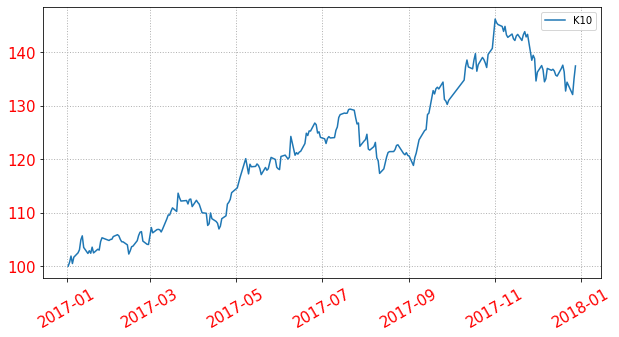

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(k10['K10'])
plt.legend(['K10']) # 범주표시
plt.xticks(color = 'r', fontsize = 15, rotation = 30)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

In [92]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    # 파라미터로는 
    # index_cd (코드명. ex, 코스피, 코스피200 ..) 
    # start_date(원하는 기간의 시작일), end_date(종료일) 날짜를 문자열로 넣는다
    # page_n =1   항상 1페이지 부터 시작한다
    # last_page = 0  마지막페이지는 아직 몇인지 모르니 우선 0으로 놓는다
    
    if start_date:                                   # 만약 start_date를 정의해줬으면
        start_date = date_format(start_date)        # start_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        start_date = dt.date.today()                # 만약 start_date를 정의해주지 않았다면 오늘 날짜로 정의
    
    if end_date:                                    # 만약 end_date를 정의해줬으면
        end_date = date_format(end_date)            # end_date를 위에서 만든 date_format함수로 원하는 형태로 바꿔주자
    else:
        end_date = dt.date.today()                  # 만약 end_date를 정의해주지 않았다면 오늘 날짜로 정의
        
        
    # 코스피200 일별시세 url 소스코드를 가져오기
        
    naver_index = r'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + r'&page=' + str(page_n)
    source = urlopen(naver_index).read()
    source = BeautifulSoup(source, 'lxml')
    
    dates = source.find_all('td', class_ = 'date')          # 날짜수집
    prices = source.find_all('td', class_ = 'number_1')     # 지수수집
    
    
    
    for n in range(len(dates)): # 특정페이지에서 6개의 날짜가 출력됨. 6개의 날짜데이터 모두 코르블록 실행
        
        if dates[n].text.split('.')[0].isdigit():  # 만약 n번째 페이지의 날짜데이터의 첫번째 인덱스가 숫자라면 코드블록 실행
                                                   # (날짜데이터가 맞는지 확인하는?)
        
            # 날짜 처리를 처리
            
            this_date = dates[n].text              # n번째 태그에서 날짜인 text만 가져오기
            this_date = date_format(this_date)     # 위에서 정의해준 date_format함수로 원하는 형태로 날짜 만들어주기
            
            # 만약 this_date가 정의해줄 end_date보다 작거나 같고 start_date보다 크거나 같으면 코드블록 실행
            # 즉 end_date와 start_date 사이의 날짜들에 대해서만 코드 실행
            
            if this_date <= end_date and this_date >=start_date:  
                
            # 종가 처리
                this_close = prices[n*4].text            #종가는 ('td', class_='number_1')을 가진 소스들의 5번째에 옴
                                                         # 그러므르 인덱스는 4의 배수(4*n)이 필요

                this_close = this_close.replace(',', '')  # 숫자의 천 단위마다 있는 ,를 빼준다.
                this_close = float(this_close)            # 그후 실수타입으로 바꿔줌

            # 딕셔너리에 저장
                historical_prices[this_date] = this_close # 날짜:종가 형태가 나올 수 있도록 dict에 저장
            
            elif this_date < start_date:                  
                return historical_prices
            
    # 페이지 내비게이션 / 일별시세의 마지막 페이지가 몇인지 알기위함
    if last_page == 0:                          
        last_page = source.find('td', class_ = 'pgRR').find('a')['href']
        last_page = last_page.split('&')[1]
        last_page = int(last_page.split('=')[1])
    
    # 다음페이지 호출
    if page_n <= last_page: #페이지가 마지막 페이지까지 돌 수 있도록 하기
        page_n += 1        #페이지는 하나씩 올라가야함
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)
        
        # 만약 마지막 페이지가 5라고 하면
        # 우리가 정의해준 함수 historical_index_naver는
        # historical_index_naver(index_cd, start_date, end_date, 1, 5)
        # historical_index_naver(index_cd, start_date, end_date, 2, 5) ... 이런식으로 page_n가 5가 될때까지 실행
    
    return historical_prices # 반환은 dict 타입인 historical_prices로 한다

index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2017-1-1', '2017-12-31')
historical_prices

{datetime.date(2017, 12, 28): 324.74,
 datetime.date(2017, 12, 27): 320.25,
 datetime.date(2017, 12, 26): 318.89,
 datetime.date(2017, 12, 22): 321.21,
 datetime.date(2017, 12, 21): 319.72,
 datetime.date(2017, 12, 20): 325.79,
 datetime.date(2017, 12, 19): 326.76,
 datetime.date(2017, 12, 18): 326.6,
 datetime.date(2017, 12, 15): 326.23,
 datetime.date(2017, 12, 14): 324.74,
 datetime.date(2017, 12, 13): 326.18,
 datetime.date(2017, 12, 12): 324.07,
 datetime.date(2017, 12, 11): 325.09,
 datetime.date(2017, 12, 8): 324.68,
 datetime.date(2017, 12, 7): 323.59,
 datetime.date(2017, 12, 6): 324.52,
 datetime.date(2017, 12, 5): 329.61,
 datetime.date(2017, 12, 4): 328.77,
 datetime.date(2017, 12, 1): 324.78,
 datetime.date(2017, 11, 30): 325.25,
 datetime.date(2017, 11, 29): 330.68,
 datetime.date(2017, 11, 28): 330.99,
 datetime.date(2017, 11, 27): 329.53,
 datetime.date(2017, 11, 24): 335.44,
 datetime.date(2017, 11, 23): 334.51,
 datetime.date(2017, 11, 22): 335.49,
 datetime.date(2017

In [96]:
kospi200 = historical_prices
kospi200

{datetime.date(2017, 12, 28): 324.74,
 datetime.date(2017, 12, 27): 320.25,
 datetime.date(2017, 12, 26): 318.89,
 datetime.date(2017, 12, 22): 321.21,
 datetime.date(2017, 12, 21): 319.72,
 datetime.date(2017, 12, 20): 325.79,
 datetime.date(2017, 12, 19): 326.76,
 datetime.date(2017, 12, 18): 326.6,
 datetime.date(2017, 12, 15): 326.23,
 datetime.date(2017, 12, 14): 324.74,
 datetime.date(2017, 12, 13): 326.18,
 datetime.date(2017, 12, 12): 324.07,
 datetime.date(2017, 12, 11): 325.09,
 datetime.date(2017, 12, 8): 324.68,
 datetime.date(2017, 12, 7): 323.59,
 datetime.date(2017, 12, 6): 324.52,
 datetime.date(2017, 12, 5): 329.61,
 datetime.date(2017, 12, 4): 328.77,
 datetime.date(2017, 12, 1): 324.78,
 datetime.date(2017, 11, 30): 325.25,
 datetime.date(2017, 11, 29): 330.68,
 datetime.date(2017, 11, 28): 330.99,
 datetime.date(2017, 11, 27): 329.53,
 datetime.date(2017, 11, 24): 335.44,
 datetime.date(2017, 11, 23): 334.51,
 datetime.date(2017, 11, 22): 335.49,
 datetime.date(2017

In [103]:
k200 = pd.DataFrame({'K200' : kospi200})
k200

,K200
2017-01-02,260.36
2017-01-03,262.97
2017-01-04,263.12
2017-01-05,261.98
2017-01-06,263.20
...,...
2017-12-21,319.72
2017-12-22,321.21
2017-12-26,318.89
2017-12-27,320.25


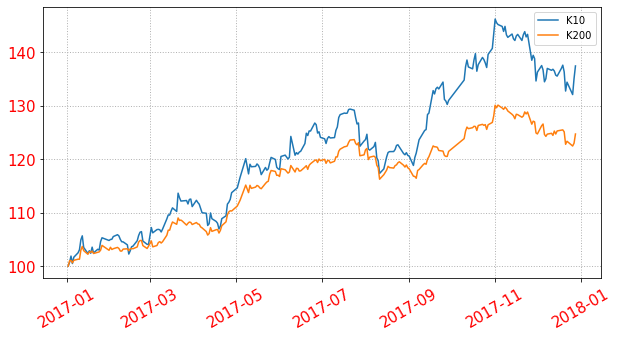

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.plot(k10['K10'])
plt.plot((k200 / k200['K200'][0]) * 100)
plt.legend(['K10', 'K200']) # 범주표시
plt.xticks(color = 'r', fontsize = 15, rotation = 30)
plt.yticks(color = 'r', fontsize = 15)
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)